In [5]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

In [3]:
import re
import pandas as pd

# 示例数据
methods_data = {
    'PINN': """
    [0.10953429435880885, 0.10188580193347999, 0.11887467078913502, 0.10770325961121309, 0.11101209890282068, 0.11149430681615305, 0.1164647477003191, 0.10851317208745644, 0.10091983859591293, 0.12410578508828647]
    Error u of fuhe active learning(LHS sampling): 1.110508e-01
    [0.028075367232661172, 0.026350177230139434, 0.030452805424009254, 0.027127110823896558, 0.02869727311622401, 0.028528564379735718, 0.029803272958043036, 0.027531080327509387, 0.025282462235504493, 0.032252880138013786]
    MAE of fuhe active learning(LHS sampling): 2.841010e-02
    [0.0033177860193371817, 0.002872991974298256, 0.00387802638640368, 0.003206230324487315, 0.0033982243448860013, 0.0034263695880600276, 0.0037684043272206147, 0.003236463975929967, 0.0028176228244157675, 0.00427639539304396]
    MSE of fuhe active learning(LHS sampling): 3.419852e-03
    """,
    'Xianxing': """
    [0.10950701200325647, 0.10189784756718805, 0.11888376237631017, 0.10771626341618158, 0.11101459342911447, 0.11149702752028366, 0.11647636144725246, 0.10851398322244077, 0.1009247245225469, 0.12411389487871637]
    Error u of fuhe active learning(LHS sampling): 1.110545e-01
    [0.028064814242614176, 0.026352842088857315, 0.030454722217864917, 0.027130368931659796, 0.028698316792299707, 0.02852866035128893, 0.029806009638372655, 0.027531283067648217, 0.02528378956254028, 0.03225470959983939]
    MAE of fuhe active learning(LHS sampling): 2.841055e-02
    [0.003316136701754897, 0.0028736565710842125, 0.0038786154401007217, 0.003207008549256782, 0.0033984002622614337, 0.003426529177866767, 0.0037691598891691487, 0.0032365231873480787, 0.0028179138284857566, 0.0042769692717493715]
    MSE of fuhe active learning(LHS sampling): 3.420091e-03
    """,
    'Residual': """
    [0.036357443077419296, 0.04220650738939285, 0.04172720947471763, 0.03870110962468484, 0.035246194209584025, 0.04062525323729391, 0.0361469443929938, 0.0417874322486287, 0.037631459163869924, 0.037839775274954156]
    Error u of fuhe active learning(LHS sampling): 3.882693e-02
    [0.018281619862736857, 0.02068691768053803, 0.019496317811446777, 0.020042914016764824, 0.01773981748284468, 0.020634877432680887, 0.018536832438525407, 0.021780267025360737, 0.018938730022240467, 0.019591700800756336]
    MAE of fuhe active learning(LHS sampling): 1.957300e-02
    [0.0005499735963973197, 0.0007451262556835075, 0.0007138002385796585, 0.0006763012795207623, 0.000557527465267994, 0.0007442596556860554, 0.0005648699251232474, 0.0007725608657020753, 0.0005469841704268731, 0.0006395281435110865]
    MSE of fuhe active learning(LHS sampling): 6.510932e-04
    """,
    'Fuhe': """
    [0.03711068567609119, 0.03810895188603196, 0.04476360797260837, 0.037354946063291775, 0.0387650776200784, 0.04252719688734671, 0.03674457321343828, 0.037552217856438884, 0.032820498996949804, 0.039611583284239665]
    Error u of fuhe active learning(LHS sampling): 3.853593e-02
    [0.018351536536571424, 0.018048241220696877, 0.021548290610624077, 0.019279526221263277, 0.01919818235863286, 0.021513046638560504, 0.01730352600371823, 0.019815666738066624, 0.016989379826744085, 0.020823033124266924]
    MAE of fuhe active learning(LHS sampling): 1.928704e-02
    [0.0005674905332990146, 0.00059534674680835, 0.0008313108895547712, 0.0006186610775715718, 0.0006373834952527079, 0.0008033203846149187, 0.0005279058266087043, 0.0006391030184562449, 0.00047913968755120917, 0.0007052850690328241]
    MSE of fuhe active learning(LHS sampling): 6.404947e-04
    """,
    'Chaos': """
    [0.0899599635177832, 0.07778768511023747, 0.09303495301688684, 0.08774742785971877, 0.08766967205981996, 0.08635628036195989, 0.09296034663685178, 0.08148828821871373, 0.08129262402707892, 0.095917169775617]
    Error u of fuhe active learning(LHS sampling): 8.742144e-02
    [0.02637180820092828, 0.02167135556640128, 0.026417979576733395, 0.023530758070220394, 0.02353080454005404, 0.024433883824370076, 0.024093324097054575, 0.022376628906879806, 0.020768386419549447, 0.02630386333921316]
    MAE of fuhe active learning(LHS sampling): 2.394988e-02
    [0.0023047803165484456, 0.0016968994861594284, 0.002448115677528774, 0.0021377870225002425, 0.002134310232487686, 0.00210801295723124, 0.002379899692320562, 0.0018532491581523172, 0.0018174189867331185, 0.0025652278863281044]
    MSE of fuhe active learning(LHS sampling): 2.144570e-03
    """,
    '0.9Residual': """
    [0.03472017544155343, 0.04767240684591524, 0.039367834545702245, 0.039569502562858766, 0.03646414727863577, 0.04552523925886167, 0.03474469313059507, 0.047859932775647755, 0.04155019360401747, 0.03871260481688835]
    Error u of fuhe active learning(LHS sampling): 4.061867e-02
    [0.018732715299371625, 0.02260764260195752, 0.020718785860279625, 0.020555965702780152, 0.019218707858668017, 0.022450223723423163, 0.018669431774988584, 0.023728748201234186, 0.020066337857213904, 0.020584763181287376]
    MAE of fuhe active learning(LHS sampling): 2.073333e-02
    [0.0005472120409236444, 0.0008526494166380015, 0.0007216596518663955, 0.0006514504443566653, 0.0005971165759890504, 0.0008085947574856368, 0.0005378735978677137, 0.0008544045329240146, 0.0006078346406314601, 0.0006674298398836095]
    MSE of fuhe active learning(LHS sampling): 6.846225e-04
    """,
    '0.8Residual': """
    [0.03454446903457259, 0.0461846127454666, 0.039568963925198625, 0.04012430118493751, 0.037072924335176685, 0.04670795863035916, 0.03519053196667676, 0.04512588222429764, 0.03976133034265811, 0.03941378759323175]
    Error u of fuhe active learning(LHS sampling): 4.036948e-02
    [0.018563645730174015, 0.022221296945067828, 0.02095153055087657, 0.020806709364215106, 0.019570612797263364, 0.022996980451548448, 0.0178967200039862, 0.022798545253096054, 0.019766857488849245, 0.020988212313055178]
    MAE of fuhe active learning(LHS sampling): 2.065611e-02
    [0.0005410564213681041, 0.0008192340729161216, 0.0007324199824577531, 0.0006643897863120134, 0.0006073694314433037, 0.0008432941487946295, 0.0005261265202203556, 0.0007952288608157819, 0.0005887928916735777, 0.0006901824099117647]
    MSE of fuhe active learning(LHS sampling): 6.808095e-04
    """,
    '0.7Residual': """
    [0.03505797235125594, 0.04446634923560984, 0.03992413549572962, 0.03880626855302619, 0.037416525638073114, 0.04538774922889051, 0.035668797446812915, 0.044411055172998364, 0.03739797805118793, 0.03889335850619]
    Error u of fuhe active learning(LHS sampling): 3.974302e-02
    [0.018242972732572443, 0.02201094496474411, 0.021182331397787676, 0.020450718127781507, 0.019768994277971356, 0.022779487386425323, 0.01735855989466438, 0.02274975737666002, 0.019022487573255836, 0.020810374712943266]
    MAE of fuhe active learning(LHS sampling): 2.043766e-02
    [0.0005393506686853345, 0.0008003618799324611, 0.0007384636143270514, 0.0006584209549986867, 0.0006265312066786793, 0.0008356736910626893, 0.0005120991539327244, 0.0007992274327519555, 0.0005547141349015483, 0.0006798184879318517]
    MSE of fuhe active learning(LHS sampling): 6.744661e-04
    """,
    '0.6Residual': """
    [0.03615672108997349, 0.04085442333154563, 0.04083120918778619, 0.04344579114370834, 0.037575697147899635, 0.04295332443927995, 0.03371699471485468, 0.04009193685750817, 0.03310256749769429, 0.038876907614209325]
    Error u of fuhe active learning(LHS sampling): 3.876056e-02
    [0.01813623448385606, 0.020780865813180085, 0.020783483791987124, 0.02303203857167242, 0.01954865865754858, 0.022226249249872904, 0.016909239241654623, 0.021214158797466173, 0.017632152242995063, 0.02076118079333121]
    MAE of fuhe active learning(LHS sampling): 2.010243e-02
    [0.0005486658712402231, 0.0007260986910690245, 0.0007403539044729281, 0.0008191361499460938, 0.0006386972350693936, 0.0008137823799132479, 0.00047696929833445734, 0.0007031419169809924, 0.0004981549153425643, 0.0006858905895875672]
    MSE of fuhe active learning(LHS sampling): 6.650891e-04
    """,
    '0.4Residual': """
    [0.0397654487205806, 0.040858955204060576, 0.049911358785864814, 0.04127036330179534, 0.04019427126891923, 0.043325987610918375, 0.03943846736829146, 0.03838049126365801, 0.03503237296310903, 0.04114106555715522]
    Error u of fuhe active learning(LHS sampling): 4.093188e-02
    [0.01888457672206663, 0.01825454663548074, 0.02205289710337747, 0.01923877711616384, 0.018648935272305715, 0.021168563991164565, 0.017190004171559428, 0.019234316985763448, 0.016311979089153206, 0.020343373177715545]
    MAE of fuhe active learning(LHS sampling): 1.913280e-02
    [0.0006248171856187903, 0.0006443457566928176, 0.0009390983668115725, 0.0006663294713260124, 0.0006381739771307214, 0.0008005121094053723, 0.0005594685817808886, 0.0006288533519474697, 0.00047941900912166363, 0.0007080497408490812]
    MSE of fuhe active learning(LHS sampling): 6.689068e-04
    """,
    '0.3Residual': """
    [0.04434695121314699, 0.046034669811531995, 0.054495814014954104, 0.045799890961812174, 0.04423951872071302, 0.047111822224386396, 0.04392851627289289, 0.04306131656560854, 0.03818438005004021, 0.04920844103931138]
    Error u of fuhe active learning(LHS sampling): 4.564113e-02
    [0.019826820070149027, 0.018673113056390155, 0.02226579414929391, 0.01944263486048053, 0.01834184638649493, 0.02088320312699165, 0.017739247258039458, 0.019277556932806014, 0.015782605091952562, 0.021382094403175542]
    MAE of fuhe active learning(LHS sampling): 1.936149e-02
    [0.0007322400882876251, 0.0007363588198014177, 0.0010437205738970429, 0.0007449300009474684, 0.0006941105490193506, 0.0008518856233141982, 0.0006523783202450337, 0.000696165660580817, 0.0005039127631691, 0.0008828559181812718]
    MSE of fuhe active learning(LHS sampling): 7.538558e-04
    """,
    '0.2Residual': """
    [0.05281384987877342, 0.04902270374076847, 0.061650239020685144, 0.05229436998073628, 0.049996997171949664, 0.05447355844159189, 0.047976069230728224, 0.048070817573484075, 0.043061449963925934, 0.05482587159576347]
    Error u of fuhe active learning(LHS sampling): 5.141859e-02
    [0.021238535392541075, 0.017996018141280545, 0.022638927674078244, 0.01951543418329517, 0.01883370442757422, 0.02206207071115426, 0.017949607259076333, 0.019407540929605185, 0.01569828070618503, 0.02130415972718952]
    MAE of fuhe active learning(LHS sampling): 1.966443e-02
    [0.0009458775645797658, 0.0007675995208242191, 0.001226544266113982, 0.0008791031467828893, 0.0008070728513081917, 0.0010436210953899524, 0.0007373518268295599, 0.0007912168633210194, 0.0005809635119687127, 0.001000307651305335]
    MSE of fuhe active learning(LHS sampling): 8.779658e-04
    """,
    '0.1Residual': """
    [0.06320310498295943, 0.05799784985924242, 0.07192081268998583, 0.060336187460615656, 0.0573794946636993, 0.06416903004824788, 0.05923608684791288, 0.056914973485173534, 0.04994552100389276, 0.06375831947011812]
    Error u of fuhe active learning(LHS sampling): 6.048614e-02
    [0.02242307400328075, 0.018735426467530684, 0.0232925166762426, 0.019996489072896827, 0.019874303767829133, 0.022670934965099202, 0.018765090877682952, 0.01943977582814973, 0.015726307856800913, 0.02169529901853816]
    MAE of fuhe active learning(LHS sampling): 2.026192e-02
    [0.0012445149515671152, 0.0009925882809013156, 0.001546109184058903, 0.001087567157753189, 0.0010059945215595211, 0.001298738595149596, 0.0010193908573007066, 0.0009878187263238818, 0.0007206415683866122, 0.001236774357777176]
    MSE of fuhe active learning(LHS sampling): 1.114014e-03 
    """,

}

# 定义读取数据的函数
def extract_metrics(data):
    # 使用正则表达式提取数据
    error_u = re.findall(r'\[([^\]]+)\]', data)[0]
    mae = re.findall(r'\[([^\]]+)\]', data)[1]
    mse = re.findall(r'\[([^\]]+)\]', data)[2]
    
    # 将字符串转换为浮点数列表
    error_u = list(map(float, error_u.split(',')))
    mae = list(map(float, mae.split(',')))
    mse = list(map(float, mse.split(',')))
    
    return error_u, mae, mse

# 定义处理所有方法数据的函数
def process_methods_data(methods_data):
    data = {
        'Method': [],
        'Metric': [],
        'Values': []
    }
    
    for method, data_str in methods_data.items():
        error_u, mae, mse = extract_metrics(data_str)
        
        data['Method'].append(method)
        data['Metric'].append('Error_u')
        data['Values'].append(error_u)
        
        data['Method'].append(method)
        data['Metric'].append('MAE')
        data['Values'].append(mae)
        
        data['Method'].append(method)
        data['Metric'].append('MSE')
        data['Values'].append(mse)
    
    return pd.DataFrame(data)

# 处理方法数据并生成 DataFrame
df = process_methods_data(methods_data)

# 打印 DataFrame
print(df)

         Method   Metric                                             Values
0          PINN  Error_u  [0.10953429435880885, 0.10188580193347999, 0.1...
1          PINN      MAE  [0.028075367232661172, 0.026350177230139434, 0...
2          PINN      MSE  [0.0033177860193371817, 0.002872991974298256, ...
3      Xianxing  Error_u  [0.10950701200325647, 0.10189784756718805, 0.1...
4      Xianxing      MAE  [0.028064814242614176, 0.026352842088857315, 0...
5      Xianxing      MSE  [0.003316136701754897, 0.0028736565710842125, ...
6      Residual  Error_u  [0.036357443077419296, 0.04220650738939285, 0....
7      Residual      MAE  [0.018281619862736857, 0.02068691768053803, 0....
8      Residual      MSE  [0.0005499735963973197, 0.0007451262556835075,...
9          Fuhe  Error_u  [0.03711068567609119, 0.03810895188603196, 0.0...
10         Fuhe      MAE  [0.018351536536571424, 0.018048241220696877, 0...
11         Fuhe      MSE  [0.0005674905332990146, 0.00059534674680835, 0...
12        Ch

In [14]:
# 展开 Values 列
df = df.explode('Values').reset_index(drop=True)

# 将 Values 列转换为浮点数
df['Values'] = df['Values'].astype(float)

# 打印 DataFrame
print(df)

          Method   Metric    Values
0           PINN  Error_u  0.109534
1           PINN  Error_u  0.101886
2           PINN  Error_u  0.118875
3           PINN  Error_u  0.107703
4           PINN  Error_u  0.111012
..           ...      ...       ...
385  0.1Residual      MSE  0.001299
386  0.1Residual      MSE  0.001019
387  0.1Residual      MSE  0.000988
388  0.1Residual      MSE  0.000721
389  0.1Residual      MSE  0.001237

[390 rows x 3 columns]


C:\Users\cheny\AppData\Local\Temp\ipykernel_13760\2374336421.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


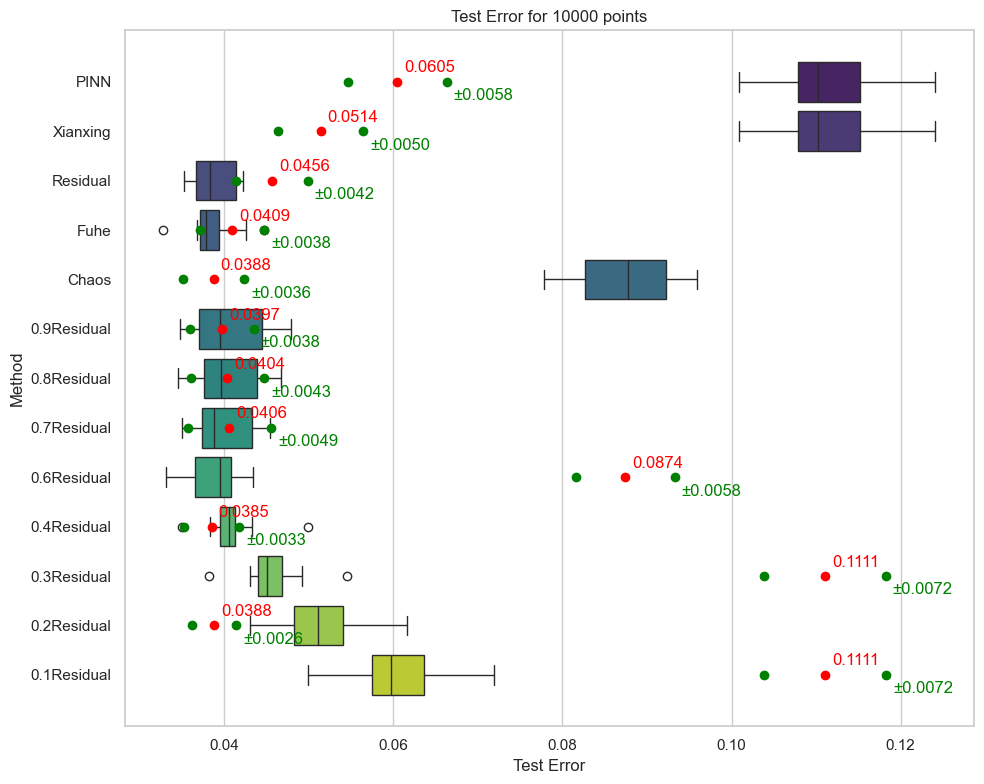

In [41]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'Error_u']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('Test Error for 10000 points')
ax.set_ylabel('Method')
ax.set_xlabel('Test Error')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.4f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.4f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()

In [42]:
(0.0456-0.0385)/0.0385

0.18441558441558448

C:\Users\cheny\AppData\Local\Temp\ipykernel_13760\1454481717.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


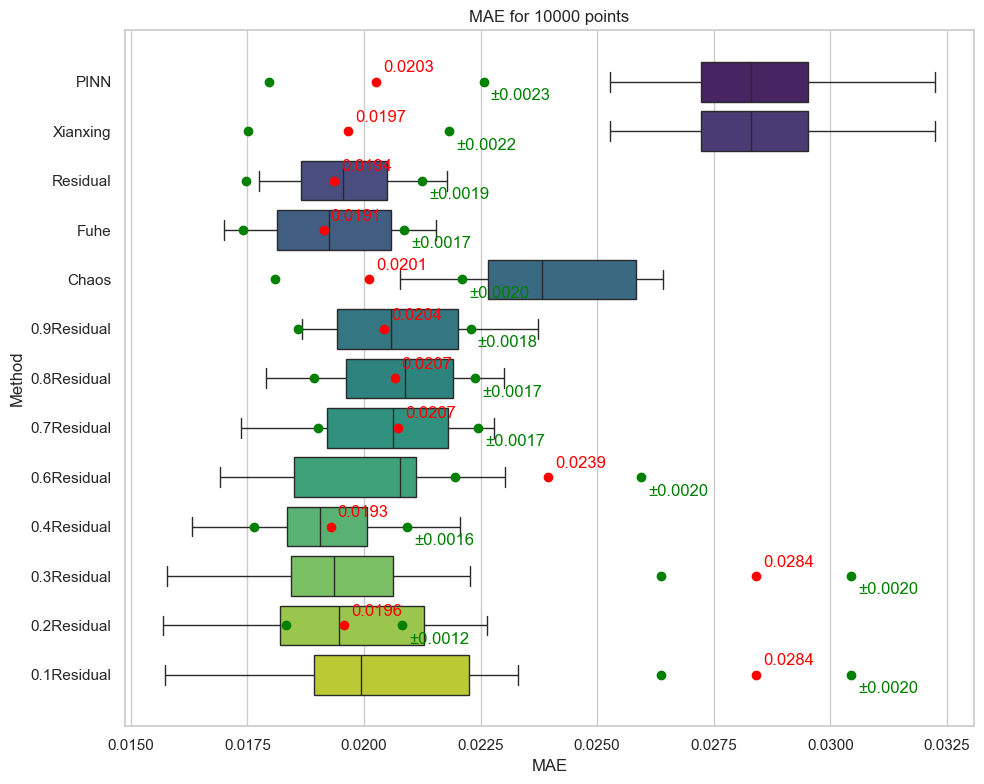

In [40]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'MAE']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('MAE for 10000 points')
ax.set_ylabel('Method')
ax.set_xlabel('MAE')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.4f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.4f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_13760\2288246616.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


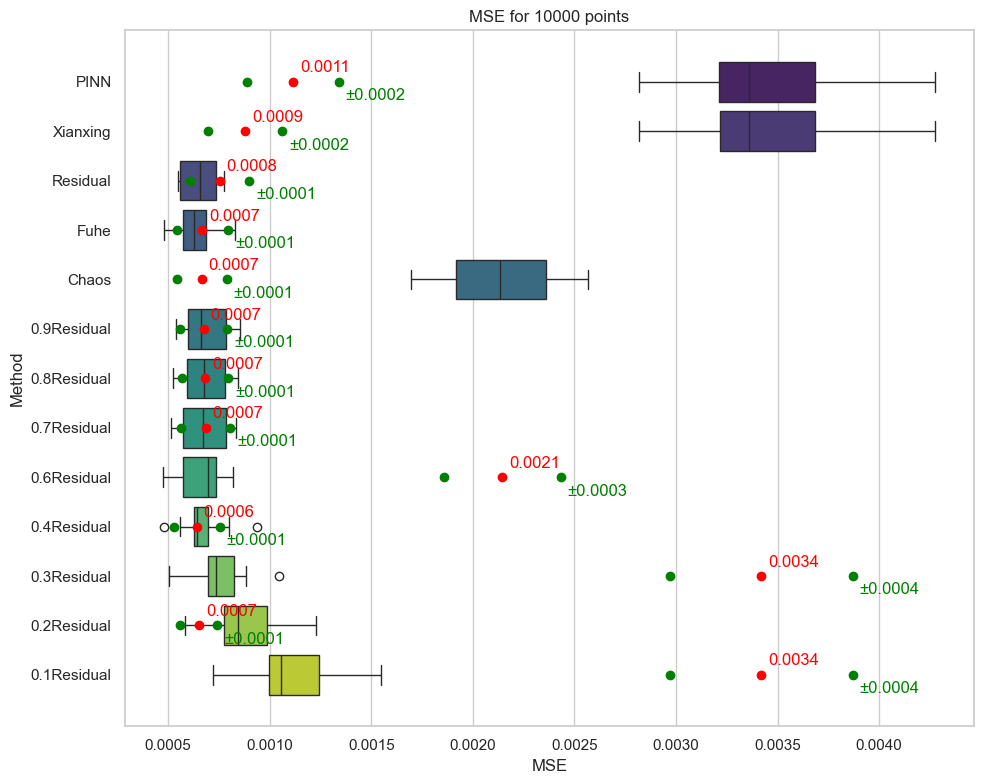

In [39]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'MSE']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('MSE for 10000 points')
ax.set_ylabel('Method')
ax.set_xlabel('MSE')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.4f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.4f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()